In [1]:
import numpy as np
import scipy.stats as ss
import pandas as pd
import seaborn as sns

from scipy.stats import f_oneway

from matplotlib import pyplot as plt, colors as mcolors, gridspec


# 1 

Investigate the impact of sample size on the t-distribution through a Python program. Generate random samples of varying sizes from a standard normal distribution, compute t-statistics, and visually track the evolution of the t-distribution with increasing sample size. Provide an analysis report on the interpretation of the plots.

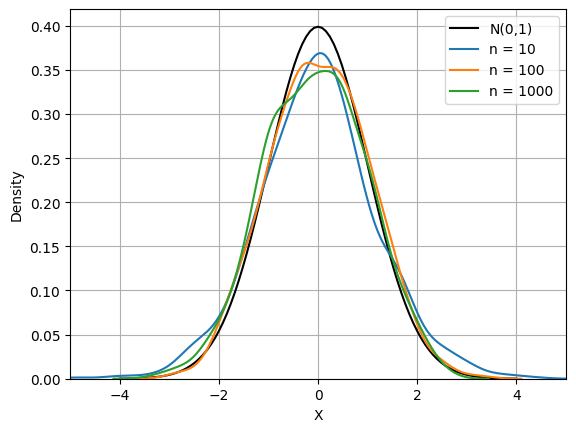

In [2]:
np.random.seed(42)

X = np.arange(-4, 4.01, 8/100)
Z = ss.norm(0, 1).pdf(X)

plt.plot(X, Z, 'k', label = 'N(0,1)')

samples_sizes = [10, 100, 1000]

t = []

for n in samples_sizes:  

    # Generate random samples of size n from a standard normal distribution
    X = np.random.normal(loc = 0, scale = 1, size = (n, 1000))
    
    X_mean = X.mean(0) # 1000 samples means
    X_std = X.std(0) # 1000 samples sdevs

    t_n = np.array(X_mean / (X_std / np.sqrt(n))) # 1000 t-statistics for sample size n

    t.append(t_n)
    
    # plt.hist(t_n, alpha = 0.5, density = True)    
    sns.kdeplot(t_n, label = f"n = {n}")

plt.xlabel('X')
plt.ylabel('Density')
plt.xlim([-5, 5])
plt.grid()
plt.legend() ;

**Analysis Report**

The Figure above shows the theoretical standarn normal distribution (black), along with three distrubtions of t-statistics computed from 1000 random samples of sizes 10 (blue), 100 (orange), and 1000 (green). As the sample size increased, the height of the two tails of the t-distribution decreased. In other words, increasing the sample size led to fewer observations of large values, indicating reduced variance.

# 2 

Simulate a dynamic Beta distribution representing the evolving conversion rate of a website based on user interactions. Visualize the changing distribution over multiple time steps. Provide a detailed analysis report interpreting the plots and insights gained from the dynamic Beta simulation.


In [3]:
# a = conversion, b = no conversion

def simulate_dynamic_beta(N = 100, init_a = 1, init_b = 1):

    a, b = init_a, init_b
    
    expected_p = []
    conversion = []
    param = []
    for n in range(N):
        
        # Expected probability of conversion
        expect_p_n = a/(a+b)

        # Conversion at n_th step (1 (yes) or 0 (no))
        conversion_n = ss.bernoulli(p = expect_p_n).rvs()
        
        # Update success (a) and failure (b) parameters
        a, b = a+conversion_n, b+(1-conversion_n)    

        # collect results
        expected_p.append(expect_p_n)
        conversion.append(conversion_n)
        param.append((a, b))
    
    expected_p = np.stack(expected_p)
    conversion = np.stack(conversion)
    param = np.stack(param)
    
    return param, conversion, expected_p

In [4]:
## User #1
a1, b1 = 5, 5

## User #2
a2, b2 = 2, 8

## User #3
a3, b3 = 8, 2

N = 200

param_1, conversion_1, expected_p_1 = simulate_dynamic_beta(N, init_a = a1, init_b = b1)    
param_2, conversion_2, expected_p_2 = simulate_dynamic_beta(N, init_a = a2, init_b = b2)
param_3, conversion_3, expected_p_3 = simulate_dynamic_beta(N, init_a = a3, init_b = b3)

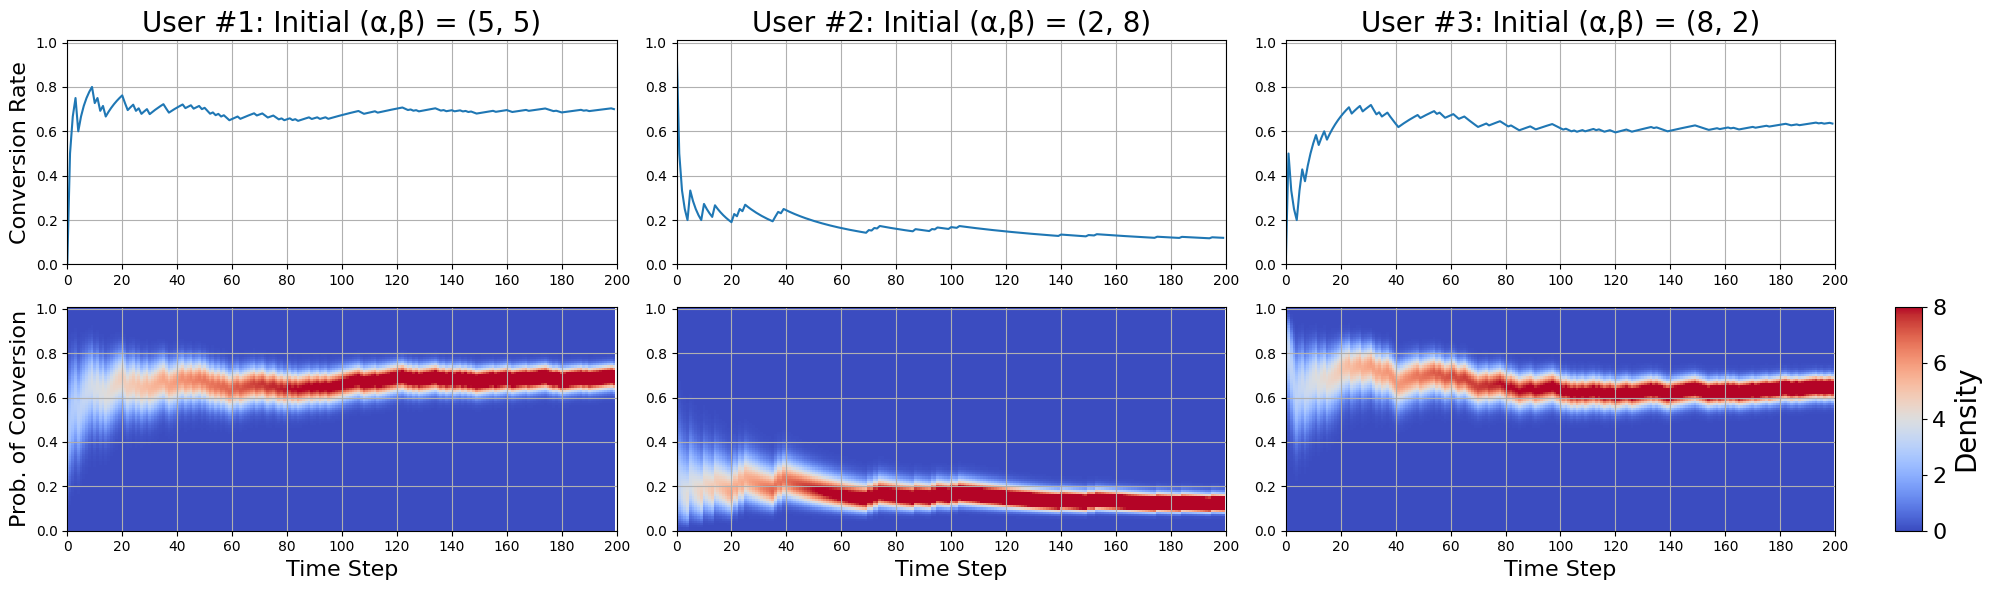

In [5]:

x = np.arange(0, 1.01, .01)

t = np.arange(N)

X, Y = np.meshgrid(x, t)

cum_N = np.arange(1, N+1)

conversion_rate_1 = conversion_1.cumsum()/cum_N
conversion_rate_2 = conversion_2.cumsum()/cum_N
conversion_rate_3 = conversion_3.cumsum()/cum_N

Z_1 = np.array([ss.beta.pdf(x, a, b) for a, b in param_1])
Z_2 = np.array([ss.beta.pdf(x, a, b) for a, b in param_2])
Z_3 = np.array([ss.beta.pdf(x, a, b) for a, b in param_3])

fig = plt.figure(figsize=(20, 6))  # Adjust the figsize to accommodate the colorbar

gs = gridspec.GridSpec(2, 4, width_ratios = [1, 1, 1, 0.05])

cmap = 'coolwarm'
vmax = 8

# Create subplots

ax00 = fig.add_subplot(gs[0,0])
ax01 = fig.add_subplot(gs[0,1])
ax02 = fig.add_subplot(gs[0,2])
ax10 = fig.add_subplot(gs[1,0])
ax11 = fig.add_subplot(gs[1,1]) # Share y-axis with ax1
ax12 = fig.add_subplot(gs[1,2]) # Share y-axis with ax1
ax13 = fig.add_subplot(gs[1,3])

# Plot with pcolormesh
plot00 = ax00.plot(t, conversion_rate_1)
plot01 = ax01.plot(t, conversion_rate_2)
plot02 = ax02.plot(t, conversion_rate_3)

surf10 = ax10.pcolormesh(Y, X, Z_1, cmap=cmap, vmin=0, vmax=vmax)
surf11 = ax11.pcolormesh(Y, X, Z_2, cmap=cmap, vmin=0, vmax=vmax)
surf12 = ax12.pcolormesh(Y, X, Z_3, cmap=cmap, vmin=0, vmax=vmax)

# Set titles and labels
ax00.set_title(f"User #1: Initial (α,β) = {a1, b1}", fontsize=20)
ax01.set_title(f"User #2: Initial (α,β) = {a2, b2}", fontsize=20)
ax02.set_title(f"User #3: Initial (α,β) = {a3, b3}", fontsize=20)

for ax in [ax00, ax01, ax02, ax10, ax11, ax12]:
    ax.grid(True)
    ax.set_xlim([0, t.max()])
    ax.set_ylim([0, 1.01])
    ax.set_xticks(np.arange(0, t.max()+20, 20))
    if ax in [ax10, ax11, ax12]:
        ax.set_xlabel('Time Step', fontsize=16)

ax00.set_ylabel('Conversion Rate', fontsize=16)
ax10.set_ylabel('Prob. of Conversion', fontsize=16)

# Add colorbar to the figure, associating it with all three subplots
cbar = fig.colorbar(surf12, cax = ax13, label='Density', aspect=20)
cbar.set_label('Density', size=20)
cbar.ax.tick_params(labelsize=16)

plt.tight_layout() ;


**Analysis Report**
The figure above shows the ratio of the number of conversions relative to the number of interactions (top row) and probability of conversion modeled by the Beta distribution (bottom row) for three users with different initial Beta parameters. User #1 had a balaced success/failure state (α=β=0), User #2 was failure prone (α=2,b=8), and User #3 was success prone (α=8, β=2). For initial time steps, there is greater variability in both the conversion ratio and probability of conversion. However, as time evolves, the conversion ratio and probabilities stabilize.


# 3 

You are a data scientist working for an e-commerce company. Recently, the user interface team redesigned the product page, and they want to know if the new design has made any difference in the average time users spend on that page. They provide you with two datasets: one containing the time (in seconds) users spent on the product page before the redesign (pre_redesign_times.csv), and the other containing the time users spent after the redesign (post_redesign_times.csv). Using the F-distribution, can you determine if there's a statistically significant difference in the variances of user engagement times between the two designs? Write a Python program to conduct this hypothesis test, compute the F-statistic, calculate the associated p-value, and draw a conclusion based on a significance level of 0.05. Display your findings visually to make it comprehensible for the UI team.

In [6]:
np.random.seed(42)

# Number of samples
n_samples = 1000

# Simulating engagement times before redesign
mean_pre = 300
std_dev_pre = 50
pre_redesign_times = np.random.normal(mean_pre, std_dev_pre, n_samples)

# Simulating engagement times after redesign
mean_post = 310
std_dev_post = 60
post_redesign_times = np.random.normal(mean_post, std_dev_post, n_samples)

# Save to CSV
df_pre = pd.DataFrame({'time': pre_redesign_times})
df_pre.to_csv('pre_redesign_times.csv', index=False)

df_post = pd.DataFrame({'time': post_redesign_times})
df_post.to_csv('post_redesign_times.csv', index=False)

print("Files 'pre_redesign_times.csv' and 'post_redesign_times.csv' created successfully!")

Files 'pre_redesign_times.csv' and 'post_redesign_times.csv' created successfully!


In [7]:
def f_ratio_test(group1, group2):
    
    var1, var2 = group1.var(ddof = 1), group2.var(ddof = 1)
    n1, n2 = group1.size, group2.size
    
    if var1 > var2:
        dfn, dfd = n1, n2
        F = var1 / var2
    else:
        dfn, dfd = n2, n1
        F = var2 / var1
    
    p = ss.f.sf(F, dfn, dfd)
    return F, p
    

In [8]:
# By hand
F, p_F = f_ratio_test(df_pre['time'], df_post['time'])

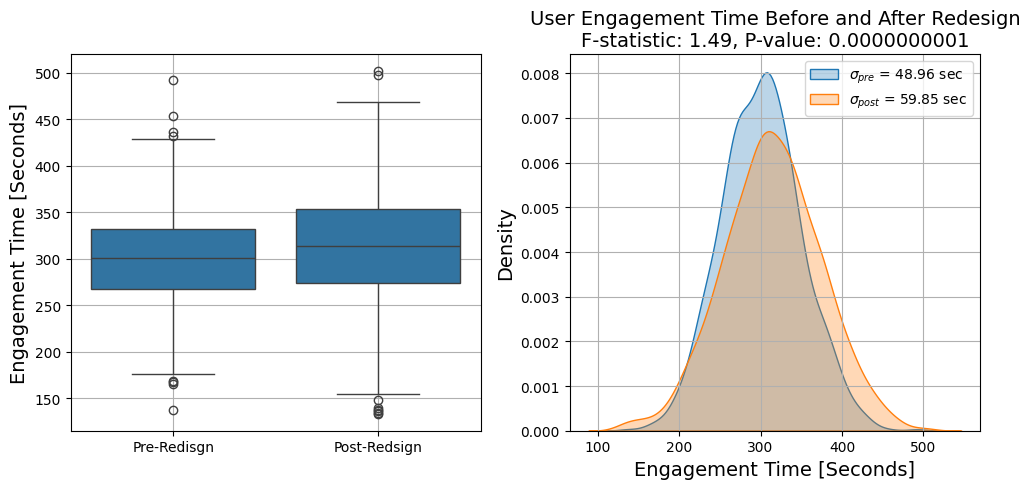

In [9]:
df_AB = pd.concat([df_pre.assign(design = 'pre'),
                   df_post.assign(design = 'post')])

# Plotting
fig = plt.figure(figsize=(10, 5))

# Boxplot for visualizing variance
ax1 = fig.add_subplot(121)
sns.boxplot(x = 'design', y = 'time', data = df_AB, ax = ax1) ;
ax1.grid(True)
ax1.set_ylabel('Engagement Time [Seconds]', fontsize = 14)
ax1.set_xticks(ticks = [0, 1], labels = ["Pre-Redisgn", "Post-Redsign"])
ax1.set_xlabel(None)

# Overlaying with density plot
ax2 = fig.add_subplot(122)
sns.kdeplot(data = df_pre['time'], label = 'Pre-Redesign', fill = True, alpha = 0.3, ax = ax2)
sns.kdeplot(data = df_post['time'], label = 'Post-Redesign', fill = True, alpha = 0.3, ax = ax2)
ax2.grid(True)
ax2.set_xlabel('Engagement Time [Seconds]', fontsize = 14)
ax2.set_ylabel('Density', fontsize = 14)
ax2.legend(labels = [f"$σ_{{pre}}$ = {df_pre['time'].std(ddof = 1):.2f} sec", 
                     f"$σ_{{post}}$ = {df_post['time'].std(ddof = 1):.2f} sec"])

# Annotating with F-statistic and P-value
plt.title(f"User Engagement Time Before and After Redesign\n"
          f"F-statistic: {F:.2f}, P-value: {p_F:.10f}", fontsize = 14) ; 

plt.tight_layout()

**Conclusion**

There is a statistically significant difference between the variances of the pre-design ($σ_{pre}$ = 51.51 sec) and post-design user ($σ_{post}$ = 58.15 sec) engagement times (F = 1.27, p < 0.001).